## Неделя 3. Среда
### Временные ряды

В этом задании тебе предстоит проанализировать продажи разных категорий товаров. Сначала это стоит сделать для одной категории, потом можно попробовать для других. 

1. Загрузи [датасет](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls) и распечатай первые 10 строк. 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
plt.style.use('seaborn-v0_8')

In [ ]:
df = pd.read_excel('Sample - Superstore.xls')
df = df[df['Category'] == 'Furniture']
df.shape

(2121, 21)

Сделай выбоорку по категории товара (используй популярную категорию: например, `Furniture`) и запиши в переменную `data`. Распечатай первые 10 строк. 

In [21]:
data = df[df['Category'] == 'Furniture']
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


2. Визуализируй данные:
    * по исходному целевому столбцу (`Sales`)
    * усреднить просуммировать по разным периодам (неделя, месяц, квартал, полугодие)

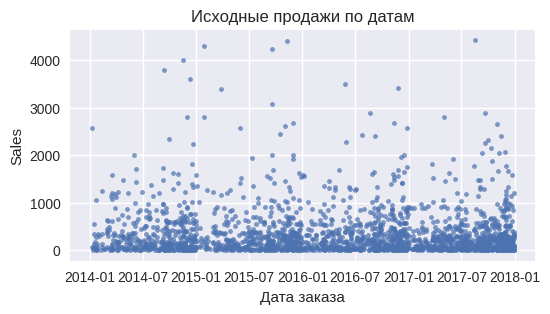

In [37]:
#проверяем что Order Date имеет тип дат
# print(data.dtypes)
plt.figure(figsize=(6,3))
plt.plot(data['Order Date'], data['Sales'], marker='.', linestyle='None', alpha=0.7)
plt.title('Исходные продажи по датам')
plt.xlabel('Дата заказа')
plt.ylabel('Sales')
plt.show()

In [68]:
# устанавливаем индекс по дате и сортируем
sales_ts = data.set_index('Order Date')['Sales'].sort_index()
print(type(sales_ts))

<class 'pandas.core.series.Series'>


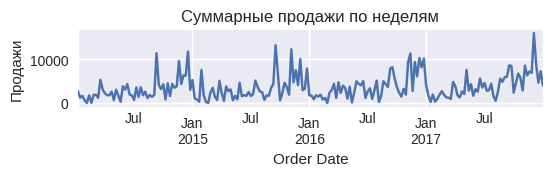

In [93]:
# по неделям
sales_weekly = sales_ts.resample('W').sum()
plt.figure(figsize=(6, 1))
sales_weekly.plot()
plt.title('Суммарные продажи по неделям')
plt.ylabel('Продажи')
plt.show()

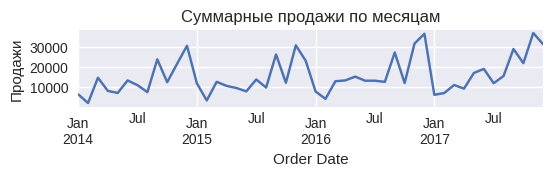

In [56]:
# по месяцам
sales_month = sales_ts.resample('M').sum()
plt.figure(figsize=(6, 1))
sales_month.plot()
plt.title('Суммарные продажи по месяцам')
plt.ylabel('Продажи')
plt.show()

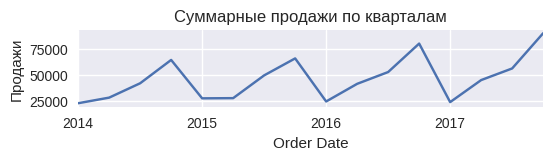

In [57]:
# кварталы
sales_quarter = sales_ts.resample('Q').sum()
plt.figure(figsize=(6, 1))
sales_quarter.plot()
plt.title('Суммарные продажи по кварталам')
plt.ylabel('Продажи')
plt.show()

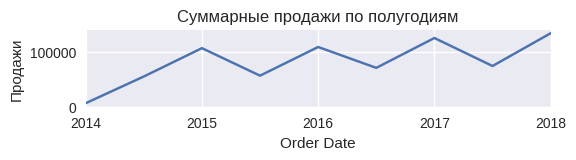

In [58]:
# полугодия
sales_halfyear = sales_ts.resample('6M').sum()
plt.figure(figsize=(6, 1))
sales_halfyear.plot()
plt.title('Суммарные продажи по полугодиям')
plt.ylabel('Продажи')
plt.show()

2.1 В качестве анализа необходимо взять временной ряд по __неделям__, и анализировать __сумму__. 

3. Построй визуализации:
* скользящего среднего


'MAE = 2310.23'

'r2 = -0.25'

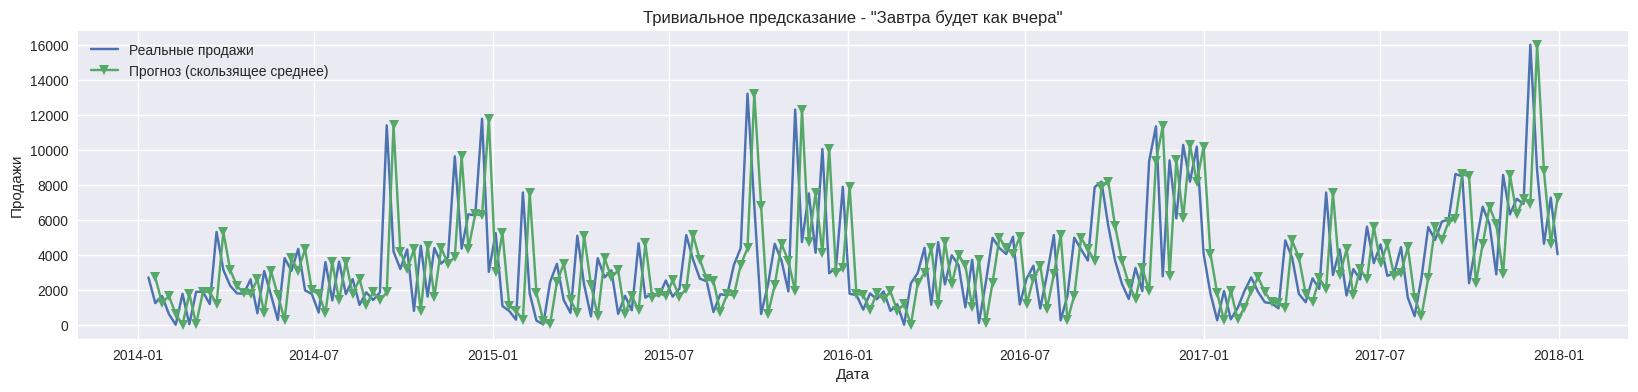

In [80]:
n_window = 1
moving_average_pred = sales_weekly.rolling(window=n_window, closed='left').mean()

moving_average_mae = np.round(mean_absolute_error(sales_weekly[n_window:], moving_average_pred[n_window:]), 2)
moving_average_r2 = np.round(r2_score(sales_weekly[n_window:], moving_average_pred[n_window:]), 2)
display(f'MAE = {moving_average_mae}')
display(f'r2 = {moving_average_r2}')
plt.figure(figsize=(20,4))
plt.plot(sales_weekly, label='Реальные продажи')
plt.plot(moving_average_pred, label='Прогноз (скользящее среднее)', marker='v')
plt.legend()
plt.title(f'Тривиальное предсказание - "Завтра будет как вчера"')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


* взвешенного скользящего среднего


MAE = 2328.52
R2 = -0.3


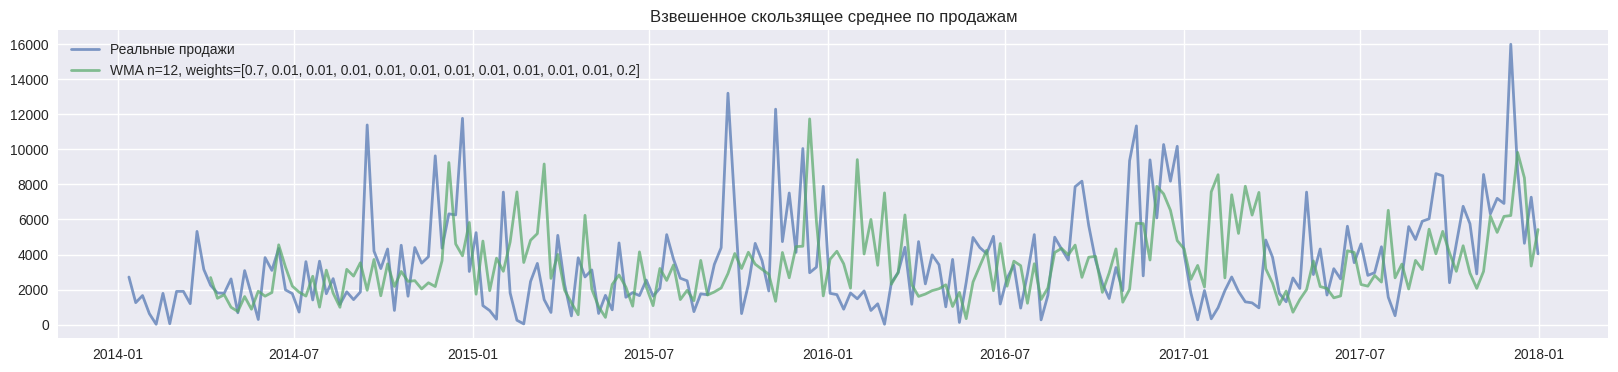

In [85]:
def weighted_moving_average(x, n, weights):
    weights = np.array(weights)
    wmas = x.rolling(n).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True).to_list()
    result = pd.Series(wmas, index=x.index).shift(1)
    return result
n_window = 12
# вес 0.7 для значений 12 месяцев назад, следующие десять месяцев по 0.01 и 0.2 последний месяц
weights = [0.7] * 1 + [0.1 / 10] * 10 + [0.2] * 1
weighted_moving_average_pred = weighted_moving_average(sales_weekly, n=n_window, weights=weights)
weighted_moving_average_mae = np.round(mean_absolute_error(sales_weekly[n_window:], weighted_moving_average_pred[n_window:]), 2)
weighted_moving_average_r2 = np.round(r2_score(sales_weekly[n_window:], weighted_moving_average_pred[n_window:]), 2)
print(f'MAE = {weighted_moving_average_mae}')
print(f'R2 = {weighted_moving_average_r2}')
plt.figure(figsize=(20,4))
plt.plot(sales_weekly, label='Реальные продажи', linewidth=2, alpha=0.7)
plt.plot(weighted_moving_average_pred, label=f'WMA n={n_window}, weights={weights}', linewidth=2, alpha=0.7)
plt.title('Взвешенное скользящее среднее по продажам')
plt.legend()
plt.show()

MAE (WMA) = 1005.8
R2 (WMA) = 0.75


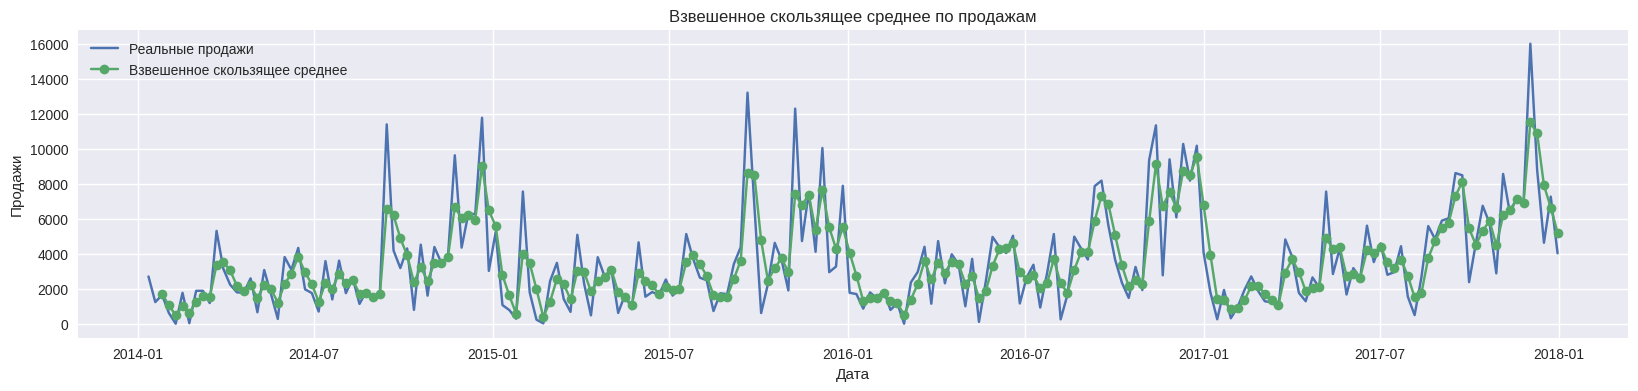

In [ ]:
# другое решение
# sales_weekly — ваш временной ряд
# задаем веса (например, для окна 3: веса растут к последнему периоду)
weights = np.array([1, 2, 3])
def weighted_moving_average(x):
    return np.dot(x, weights) / weights.sum()
# применяем rolling с окном = длина weights
window_size = len(weights)
wma = sales_weekly.rolling(window=window_size).apply(weighted_moving_average, raw=True)
# для оценки качества убираем первые NaN
wma = wma.dropna()
sales_trimmed = sales_weekly[wma.index]
mae = np.round(mean_absolute_error(sales_trimmed, wma), 2)
r2 = np.round(r2_score(sales_trimmed, wma), 2)
print(f'MAE (WMA) = {mae}')
print(f'R2 (WMA) = {r2}')
plt.figure(figsize=(20,4))
plt.plot(sales_weekly, label='Реальные продажи')
plt.plot(wma, label='Взвешенное скользящее среднее', marker='o')
plt.legend()
plt.title('Взвешенное скользящее среднее по продажам')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


Какие выводы можно сделать по скользящим линиям? Что они показывают?

Линия скользящего среднего сглаживает резкие колебания продаж и показывает,
что в течение года наблюдается плавный рост с сезонными колебаниями.
Однако в начале 2016 года виден резкий спад, на который скользящее среднее отреагировало с задержкой.
Это говорит о том, что метод не подходит для оперативного прогнозирования,
но хорошо подходит для выявления долгосрочного тренда

4. Декомпозируй данные на тренд, сезонность и остатки. 

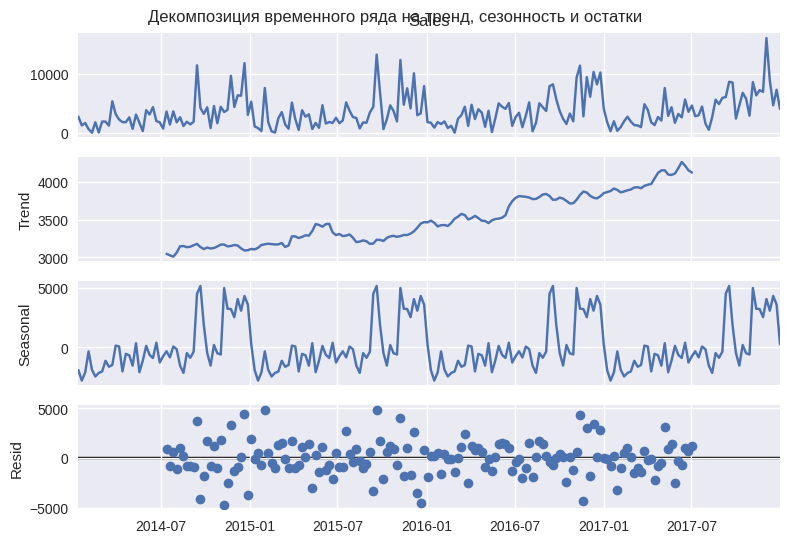

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales_weekly, model='additive')
result.plot()
plt.suptitle('Декомпозиция временного ряда на тренд, сезонность и остатки')
plt.show()


# ❓
Прокомментируй графики: какой вывод можно сделать? Есть ли в данных сезонность? Какой тренд преобладает? Какого масштаба ошибки по сравнению со значениями основного временного ряда?

есть сезонность.
тренд растущий уровень продаж растет

5. Построй графики автокорреляционной функции и частичной автокорреляционной функции. 

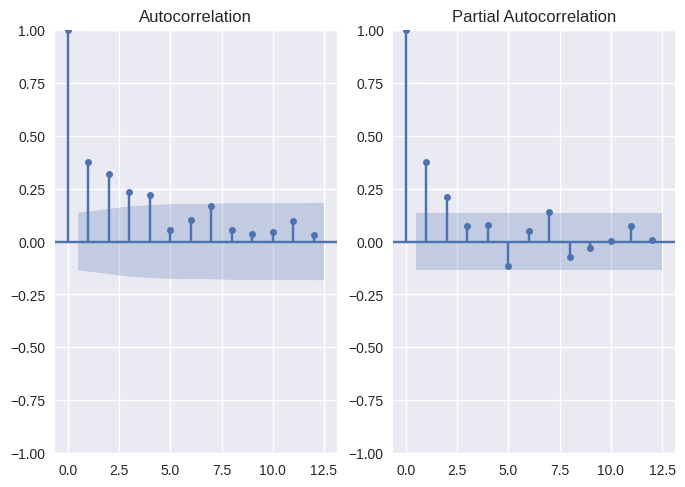

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2)
n_lags = 12
acf = plot_acf(sales_weekly, ax=ax1, lags=n_lags)
pacf = plot_pacf(sales_weekly, ax=ax2, lags=n_lags)

# ❓
Какие выводы можно сделать на основе этих графиков?

на автокорреляционной функции вначале 4 столбца выходят за доверительный интервал - бывает при сезонности. на частичной 2 столбца выхоядт за доверит интервал - автокорреляция значима на первых двух лагах, а после лага 2 автокорреляция становится незначимой.       # такая картина характерна для временного ряда с сезонностью и указывает на возможную модель авторегрессии порядка 2 (AR(2)), где текущее значение зависит от двух предыдущих значений

6. Постройте и визуализируйте модель класса ARIMA

p-value исходного временного ряда - 0.00953902660702216


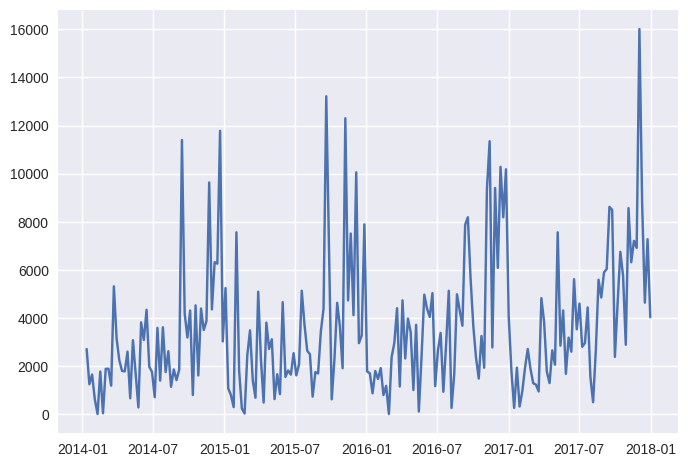

In [120]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
print(f'p-value исходного временного ряда - {adfuller(sales_weekly)[1]}')
plt.plot(sales_weekly)

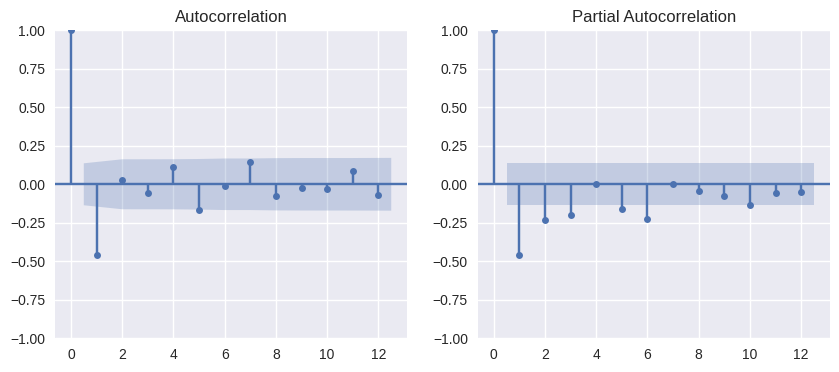

In [124]:
diff_data = np.diff(sales_weekly)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
n_lags = 12
acf = plot_acf(diff_data, ax=ax1, lags=n_lags)
pacf = plot_pacf(diff_data, ax=ax2, lags=n_lags)

In [ ]:
data_train = sales_weekly[sales_weekly.index.year < 2017]
data_test = sales_weekly[sales_weekly.index.year >= 2017]
lags = 12

# ar = AutoReg(data_train, lags=lags).fit()
# seasonality_period = 12 
# ar_pred_train = ar.fittedvalues # предсказания для train
# ar_pred = ar.forecast(len(data_test) + 3 * seasonality_period) # Предсказание для тестовых точек + еще на 3 сезона вперед
# ar_pred_test, ar_pred_future = ar_pred[:len(data_test)], ar_pred[len(data_test):] # Делим элементы из тестовой выборки и будущий периож
# # plt.plot(
# #     best_triple_exp.fittedvalues, 
# #     label=f'\u03B1 = {alpha}, \u03B2 = {betta}, \u03B3 = {gamma}; RMSE={rmse}', marker='v', color='k')
# ar_mae = round(mean_absolute_error(data_test, ar_pred_test), 3)
# ar_r2 = round(r2_score(data_test, ar_pred_test), 3)
# print(f'mae = {ar_mae}')
# print(f'r2 = {ar_r2}')
# display('Веса авторегрессии')
# ar.params
# plt.figure(figsize=(20, 10))
# plt.plot(sales_weekly, label='actual', marker='o')
# plt.plot(ar_pred_train, marker='v', color='k', label='train_predict')
# plt.plot(pd.concat((ar_pred_test, ar_pred_future)), marker='v', color='g', label='test_predict', linestyle=':')
# plt.legend()
# plt.title(f'AutoReg, mae = {ar_mae}')
# plt.show()
from statsmodels.tsa.statespace.sarimax import SARIMAX
# разделяем данные на train и test
data_train = sales_weekly[sales_weekly.index.year < 2017]
data_test = sales_weekly[sales_weekly.index.year >= 2017]
# параметры SARIMA (нужно подобрать, примерные значения)
order = (1, 1, 1)            # (p,d,q) - не сезонная часть
seasonal_order = (1, 1, 1, 52)  # (P,D,Q,s) - сезонная часть, s=52 для недельной сезонности
# обучаем модель SARIMA
sarima_model = SARIMAX(data_train, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)
# предсказания на train (подгонка)
sarima_fitted = sarima_fit.fittedvalues
# прогноз на тест и 3 сезона вперед
forecast_len = len(data_test) + 3 * seasonal_order[3]
sarima_forecast = sarima_fit.get_forecast(steps=forecast_len)
sarima_pred = sarima_forecast.predicted_mean
# разделяем прогноз на тестовый и будущий периоды
sarima_pred_test = sarima_pred[:len(data_test)]
sarima_pred_future = sarima_pred[len(data_test):]
# метрики качества на тестовой выборке
mae = mean_absolute_error(data_test, sarima_pred_test)
r2 = r2_score(data_test, sarima_pred_test)
print(f'MAE = {mae:.3f}')
print(f'R2 = {r2:.3f}')

/home/ninakhay/miniforge3/envs/unsupervised13.10.25/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE = 1570.279
R2 = 0.490


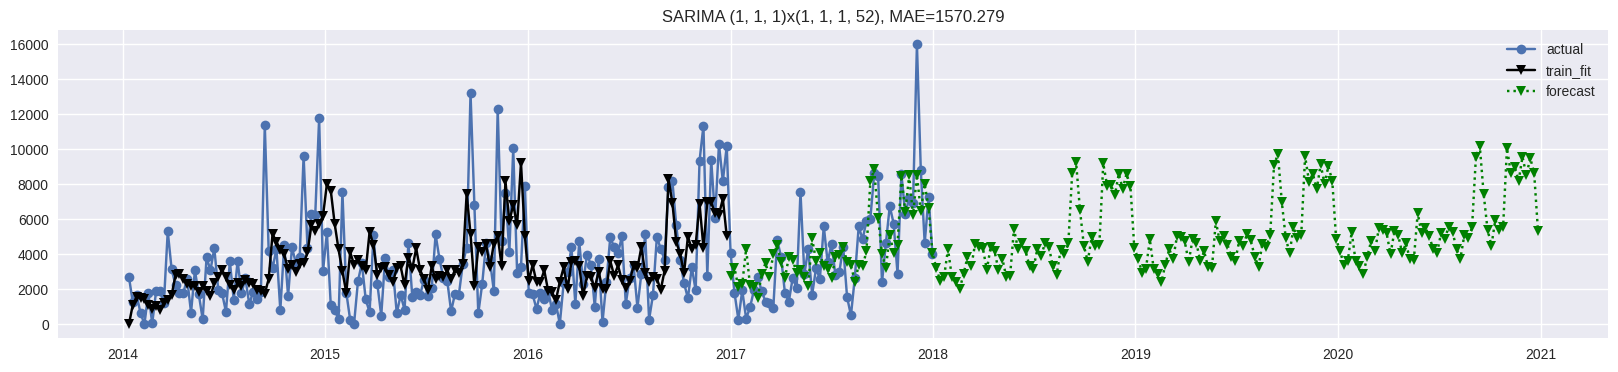

In [105]:
plt.figure(figsize=(20, 4))
plt.plot(sales_weekly, label='actual', marker='o')
plt.plot(sarima_fitted, label='train_fit', marker='v', color='black')
plt.plot(pd.concat([sarima_pred_test, sarima_pred_future]), label='forecast', marker='v', color='green', linestyle=':')
plt.legend()
plt.title(f'SARIMA {order}x{seasonal_order}, MAE={mae:.3f}')
plt.show()

7. Постройте и визуализируйте модель prophet. Попробуйте подобрать оптимальные параметры

In [110]:
from prophet import Prophet
data_prophet = sales_weekly.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'}) # Обязательное имена колнок с датой и таргетотм в prophet
data_train = data_prophet[data_prophet['ds'].dt.year < 2017]
data_test = data_prophet[data_prophet['ds'].dt.year >= 2017]
model = Prophet()
model.fit(data_train)
# количество точек для прогноза (например 5 сезонов по 52 недели)
seasonality_period = 52 
number_of_future_predicted_points = 5 * seasonality_period # Предскажем на три периода в тесте + пару периодов наперед
# создаем датафрейм будущих дат для прогноза
future = model.make_future_dataframe(periods=number_of_future_predicted_points, freq='W')
forecast = model.predict(future)

18:37:52 - cmdstanpy - INFO - Chain [1] start processing
18:37:52 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
# forecast_train = forecast[:-number_of_future_predicted_points] # Трейновый период
# forecast_test = forecast[-number_of_future_predicted_points: -number_of_future_predicted_points + len(data_test)] # Тестовый
# forecast_future = forecast[-number_of_future_predicted_points + len(data_test):] # Будущий период
# Делим прогноз на train/test/future
forecast_train = forecast[forecast['ds'] < data_test['ds'].min()]
forecast_test = forecast[(forecast['ds'] >= data_test['ds'].min()) & (forecast['ds'] < data_test['ds'].max() + pd.Timedelta(weeks=1))]
forecast_future = forecast[forecast['ds'] >= data_test['ds'].max() + pd.Timedelta(weeks=1)]
prophet_mae_train = np.round(mean_absolute_error(data_train['y'], forecast_train['yhat']), 1)
prophet_mae_test = np.round(mean_absolute_error(data_test['y'], forecast_test['yhat']), 1)
print(f"MAE train: {prophet_mae_train}")
print(f"MAE test: {prophet_mae_test}")

MAE train: 1423.6
MAE test: 1685.2


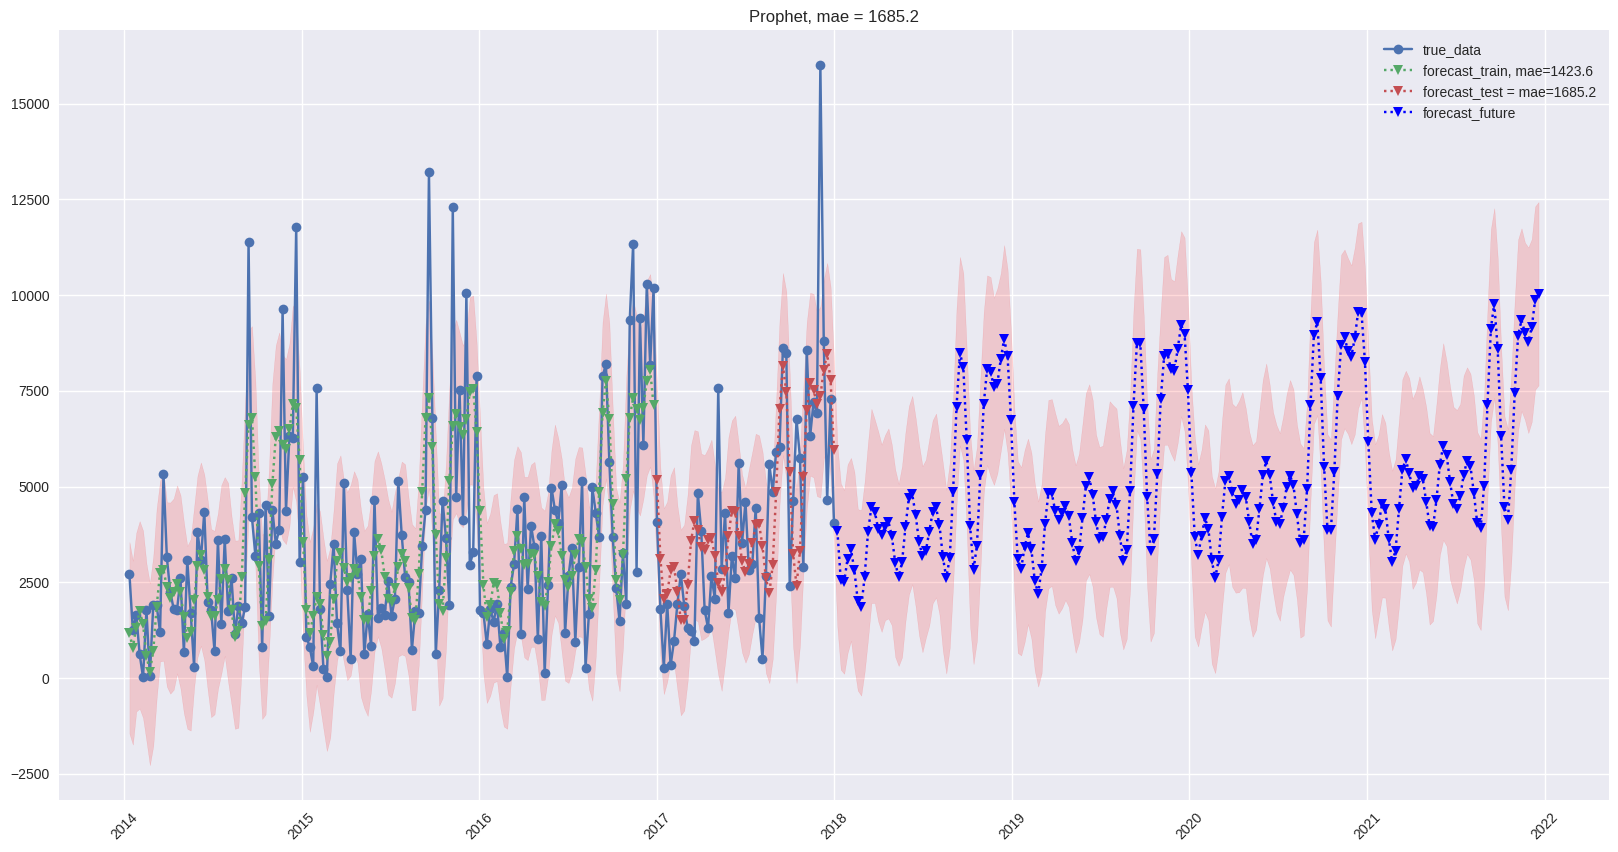

In [112]:
plt.figure(figsize=(20, 10))
plt.plot(sales_weekly, label='true_data', marker='o')
plt.plot(forecast_train['ds'], forecast_train['yhat'], marker='v', linestyle=':', label=f'forecast_train, mae={prophet_mae_train}')
plt.plot(forecast_test['ds'], forecast_test['yhat'], marker='v', linestyle=':', label=f'forecast_test = mae={prophet_mae_test}')
plt.plot(forecast_future['ds'], forecast_future['yhat'], marker='v', linestyle=':', label='forecast_future', color='b')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.15)
plt.xticks(rotation=45)
plt.title(f'Prophet, mae = {prophet_mae_test}');
plt.legend()
plt.show()

Лучшие параметры для Prophet: changepoint_prior_scale       0.090000
seasonality_prior_scale       6.000000
mae                        1674.492818
Name: 46, dtype: float64


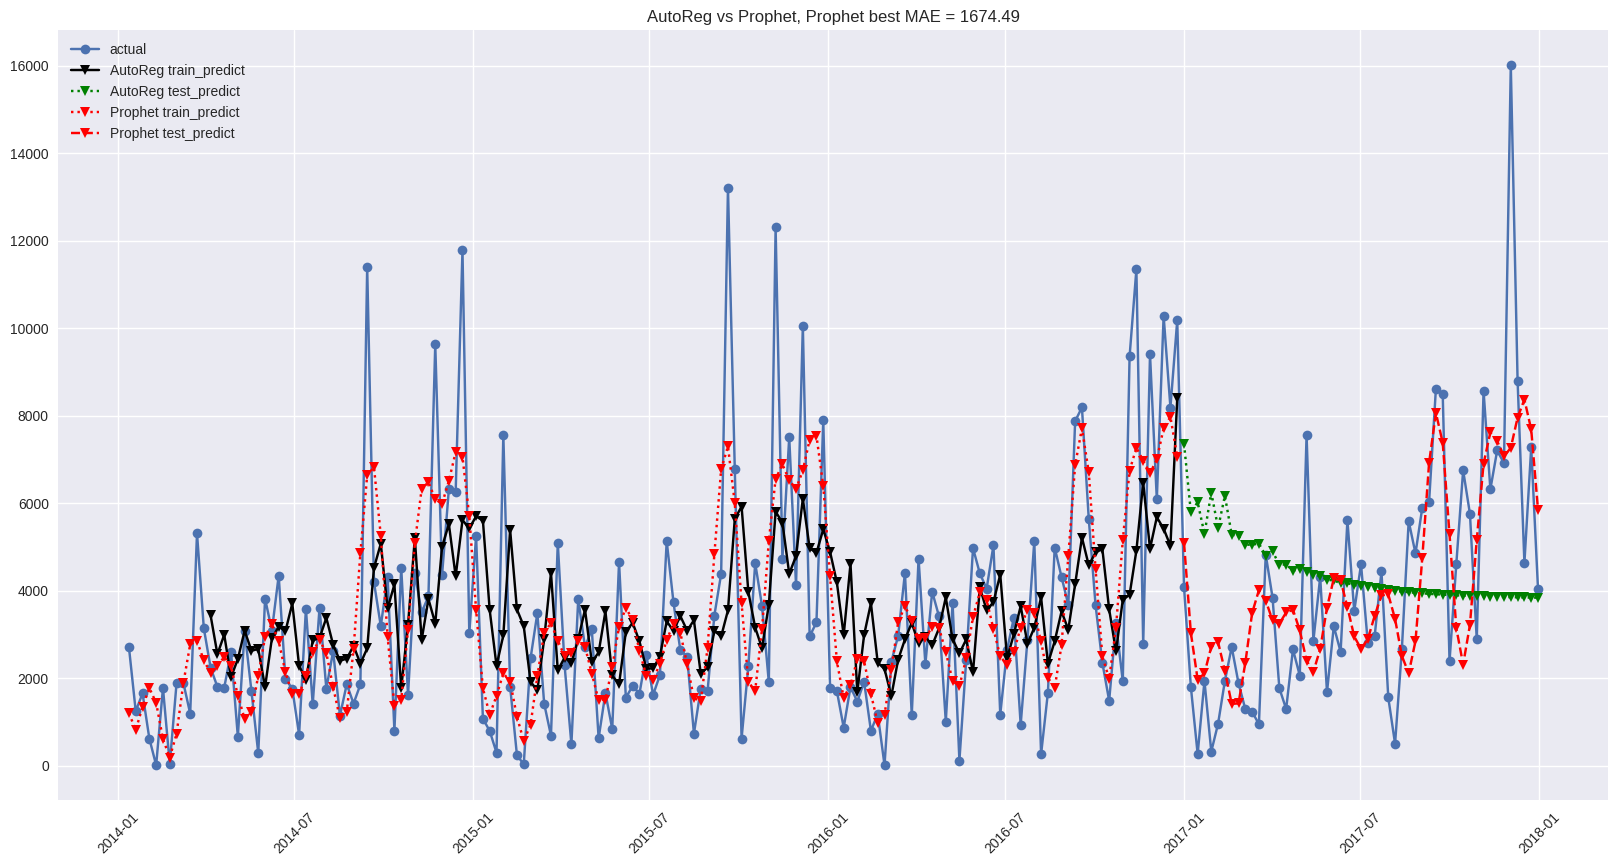

In [113]:
import itertools
import logging
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
# отключаем логи cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# предположим, что sales_weekly — это Series с индексом datetime и значениями продаж
data_prophet = sales_weekly.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# разделяем на train и test по году
data_train = data_prophet[data_prophet['ds'].dt.year < 2017]
data_test = data_prophet[data_prophet['ds'].dt.year >= 2017]
# параметры перебора для Prophet
param_grid = {  
    'changepoint_prior_scale': np.arange(0.01, 0.5, 0.04),
    'seasonality_prior_scale': np.arange(1, 10, 0.5),
}
# генерируем все комбинации параметров
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
number_of_future_predicted_points = len(data_test)  # прогнозируем на длину теста
maes = []  # для хранения MAE каждого набора параметров
for params in all_params:
    model = Prophet(**params)
    model.fit(data_train)
    future = model.make_future_dataframe(periods=number_of_future_predicted_points, freq='W')  # Частота 'W' для недельных данных
    forecast = model.predict(future)
    # выделяем прогноз на тестовый период по дате
    forecast_test = forecast[(forecast['ds'] >= data_test['ds'].min()) & (forecast['ds'] <= data_test['ds'].max())]
    
    mae = mean_absolute_error(data_test['y'], forecast_test['yhat'])
    maes.append(mae)
# формируем таблицу результатов и сортируем по MAE
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
best_params = tuning_results.loc[tuning_results['mae'].idxmin()]
print("Лучшие параметры для Prophet:", best_params)
# обучаем модель с лучшими параметрами
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)
best_model.fit(data_train)
# прогнозируем на весь период (трейн + тест + будущее, если нужно)
future = best_model.make_future_dataframe(periods=number_of_future_predicted_points, freq='W')
forecast = best_model.predict(future)
# разделяем прогнозы для визуализации
forecast_train = forecast[forecast['ds'] < data_test['ds'].min()]
forecast_test = forecast[(forecast['ds'] >= data_test['ds'].min()) & (forecast['ds'] <= data_test['ds'].max())]
# предположим, что ar_pred_train, ar_pred_test и ar_pred_future есть (из AutoReg модели)
# для корректности индексируем ar_pred_test и ar_pred_train датами
plt.figure(figsize=(20, 10))
plt.plot(sales_weekly, label='actual', marker='o')
# AutoReg прогнозы
plt.plot(ar_pred_train.index, ar_pred_train, marker='v', color='k', label='AutoReg train_predict')
plt.plot(ar_pred_test.index, ar_pred_test, marker='v', color='g', linestyle=':', label='AutoReg test_predict')
# Prophet прогнозы
plt.plot(forecast_train['ds'], forecast_train['yhat'], marker='v', color='r', linestyle=':', label='Prophet train_predict')
plt.plot(forecast_test['ds'], forecast_test['yhat'], marker='v', color='r', linestyle='--', label='Prophet test_predict')
plt.legend()
plt.title(f'AutoReg vs Prophet, Prophet best MAE = {best_params["mae"]:.2f}')
plt.xticks(rotation=45)
plt.show()


8. Примени регрессионные модели (случайный лес или градиентный бустинг) для прогнозирования целевой величины.
   * Пример есть в демо

MAE: 2002.62
R2: 0.16


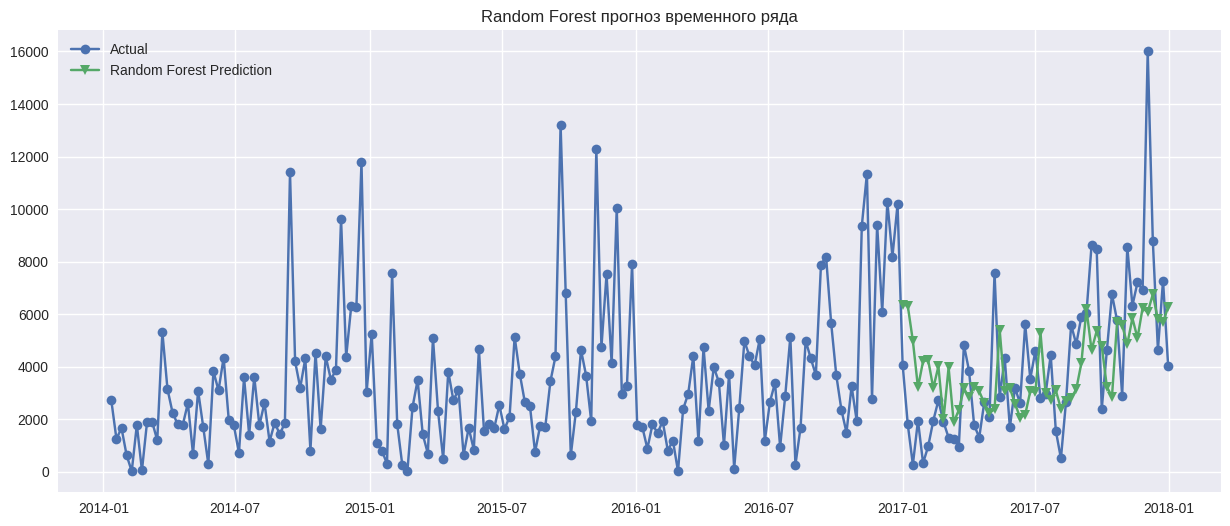

In [117]:
from sklearn.ensemble import RandomForestRegressor

# создаем признаки - лаги ряда
def create_lag_features(series, lags=12):
    df = pd.DataFrame(series)
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    df = df.dropna()
    return df

lags = 12
df_lags = create_lag_features(sales_weekly, lags)

# разделяем на train/test по дате
train = df_lags[df_lags.index.year < 2017]
test = df_lags[df_lags.index.year >= 2017]

X_train = train.drop(columns=[sales_weekly.name])
y_train = train[sales_weekly.name]

X_test = test.drop(columns=[sales_weekly.name])
y_test = test[sales_weekly.name]

# обучаем модель случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# делаем прогноз
y_pred = rf.predict(X_test)

# оцениваем качество
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

# y_pred — массив numpy, преобразуем в Series с индексом y_test.index
y_pred_series = pd.Series(y_pred, index=y_test.index)

plt.figure(figsize=(15,6))
plt.plot(sales_weekly, label='Actual', marker='o')
plt.plot(y_pred_series, label='Random Forest Prediction', marker='v')
plt.legend()
plt.title('Random Forest прогноз временного ряда')
plt.show()


9. Создайте Streamlit-приложение, в которое пользователь сможет загрузить свой файл с временным рядом, и получить результат предсказания, а так же метрики и интерпретацию результатов

In [118]:
# sales_weekly — Series с индексом дат и значениями Sales
# преобразуем его в DataFrame с нужными колонками
df_to_save = sales_weekly.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})  # 'ds' и 'y' — имена для Prophet, можно и свои
df_to_save.to_csv('sales_weekly_for_prophet.csv', index=False)


10*. Если останется время, можно попробовать дополнительно одну из библиотек: 
* [Darts](https://habr.com/ru/articles/659405/)
* [Merlion](https://habr.com/ru/companies/sportmaster_lab/articles/792318/)
* [tsfresh](https://tsfresh.readthedocs.io/en/latest/)
* [Kats](https://github.com/facebookresearch/Kats)
* [autots](https://winedarksea.github.io/AutoTS/build/html/source/tutorial.html)

In [ ]:
# code

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 
